<a href="https://colab.research.google.com/github/uuuno/tf_doodle/blob/master/LeastSquareMethod_LowLevelAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TF Low-level API

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
train_t = np.array([
                    5.2,
                    5.7,
                    8.6,
                    14.9,
                    18.2,
                    20.4,
                    25.5,
                    26.4,
                    22.8,
                    17.5,
                    11.1,
                    6.6
])

In [4]:
train_t = train_t.reshape([12,1])

In [5]:
train_x = np.array([ [mon**n for n in range(0, 5)] for mon in range(1, 13)])

In [6]:
x = tf.placeholder(tf.float32, [None, 5])

In [7]:
w = tf.Variable(tf.zeros([5, 1]))

In [10]:
y = tf.matmul(x, w)

In [11]:
t = tf.placeholder(tf.float32, [None, 1])

In [12]:
loss = tf.reduce_sum(tf.square(y-t))

In [13]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
i = 0
for _ in range(100000):
  i += 1
  sess.run(train_step, feed_dict={x:train_x, t:train_t})
  if i % 10000 == 0:
    loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
    print("Step: ", i, "\tLoss: ", loss_val)

Step:  10000 	Loss:  20.753553
Step:  20000 	Loss:  20.128706
Step:  30000 	Loss:  19.529371
Step:  40000 	Loss:  18.985298
Step:  50000 	Loss:  18.479834
Step:  60000 	Loss:  18.012241
Step:  70000 	Loss:  17.579357
Step:  80000 	Loss:  17.178448
Step:  90000 	Loss:  16.80624
Step:  100000 	Loss:  16.461517


In [17]:
sess.run(w)

array([[ 6.1065474 ],
       [-4.0423927 ],
       [ 2.5106251 ],
       [-0.28170168],
       [ 0.00834867]], dtype=float32)

In [20]:
ws = sess.run(w)
def predict(x):
  pred = sum([ ws[n][0] * x**n for n in range(0, 5) ])
  return pred

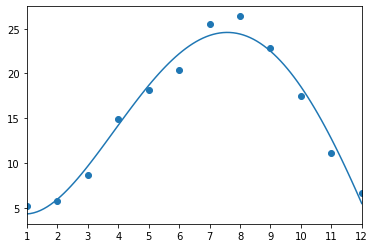

In [26]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.set_xticks(range(1, 13))
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)